<a href="https://colab.research.google.com/github/khushboolohat/Group-2-final/blob/Raman8695/khushboo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#new file

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
! pip install alpha-vantage
from alpha_vantage.timeseries import TimeSeries

In [21]:
demo = 'GF6ZHIZTJZE9APJY.' #YOUR API KEY HERE

In [22]:
url_global_deaths = r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_global_confirmed = r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_retail_stock = r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NYSE:SPG&apikey=' + demo + '&datatype=csv'
url_usa_stock = r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=' + demo + '&datatype=csv'
url_canada_stock = r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSE:BB&apikey=' + demo + '&datatype=csv'
url_travel_stock = r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=EXPE&apikey=' + demo + '&datatype=csv'
url_material_stock = r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NYSE:GOLD&apikey=' + demo + '&datatype=csv'

In [23]:
deaths_df = pd.read_csv(url_global_deaths)
confirm_df = pd.read_csv(url_global_confirmed)
us_stock = pd.read_csv(url_usa_stock)
ca_stock = pd.read_csv(url_canada_stock)
retail_stock = pd.read_csv(url_retail_stock)
travel_stock = pd.read_csv(url_travel_stock)
material_stock = pd.read_csv(url_material_stock)

In [24]:
print(deaths_df.shape)
print(confirm_df.shape)
print(us_stock.shape)
print(ca_stock.shape)
print(retail_stock.shape)
print(travel_stock.shape)
print(material_stock.shape)

(274, 413)
(274, 413)
(100, 6)
(100, 6)
(100, 6)
(100, 6)
(100, 6)


In [25]:
deaths_df_long = pd.melt(deaths_df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                        value_vars= deaths_df.columns[4:], var_name='timestamp', value_name='death_cases')

confirm_df_long = pd.melt(confirm_df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                        value_vars= confirm_df.columns[4:], var_name='timestamp', value_name='confirmed_cases')

In [26]:
deaths_df_long.head()

,Province/State,Country/Region,Lat,Long,timestamp,death_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [27]:
confirm_df_long.head()

,Province/State,Country/Region,Lat,Long,timestamp,confirmed_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [28]:
us_stock['stock_name'] = 'MSFT'
ca_stock['stock_name'] = 'BB'
retail_stock['stock_name'] = 'SPG'
travel_stock['stock_name'] = 'EXPE'
material_stock['stock_name'] = 'GOLD'

In [29]:
final_stock = pd.concat([us_stock, ca_stock, retail_stock, travel_stock, material_stock]).reset_index(drop = True)
final_stock.stock_name.unique()

array(['MSFT', 'BB', 'SPG', 'EXPE', 'GOLD'], dtype=object)

In [30]:
final_stock.shape

(500, 7)

In [31]:
final_stock.tail()

,timestamp,open,high,low,close,volume,stock_name
495,2020-10-16,27.86,27.89,27.50,27.57,8991481,GOLD
496,2020-10-15,27.97,28.08,27.56,27.75,10768733,GOLD
497,2020-10-14,28.20,28.59,27.95,28.31,10603437,GOLD
498,2020-10-13,27.80,28.06,27.18,27.96,12480095,GOLD
499,2020-10-12,27.95,28.19,27.80,28.04,9850833,GOLD


In [32]:
deaths_df_long = deaths_df_long.groupby(['Country/Region','timestamp'])['death_cases'].sum().reset_index()
confirm_df_long = confirm_df_long.groupby(['Country/Region','timestamp'])['confirmed_cases'].sum().reset_index()
final_covid = pd.concat([deaths_df_long, confirm_df_long['confirmed_cases']], axis = 1)

In [33]:
final_covid.head()

,Country/Region,timestamp,death_cases,confirmed_cases
0,Afghanistan,1/1/21,2191,51526
1,Afghanistan,1/10/21,2277,53489
2,Afghanistan,1/11/21,2288,53538
3,Afghanistan,1/12/21,2301,53584
4,Afghanistan,1/13/21,2301,53584


In [34]:
final_covid.tail()

,Country/Region,timestamp,death_cases,confirmed_cases
78523,Zimbabwe,9/5/20,206,6837
78524,Zimbabwe,9/6/20,206,6837
78525,Zimbabwe,9/7/20,210,7298
78526,Zimbabwe,9/8/20,218,7388
78527,Zimbabwe,9/9/20,222,7429


In [35]:
final_covid['timestamp'] = pd.to_datetime(final_covid.timestamp)
final_stock['timestamp'] = pd.to_datetime(final_stock.timestamp)

In [37]:
final_data = final_stock.merge(final_covid, on = 'timestamp', how = 'left')

In [38]:
final_data.head()

,timestamp,open,high,low,close,volume,stock_name,Country/Region,death_cases,confirmed_cases
0,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Afghanistan,2449,55827
1,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Albania,1897,111301
2,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Algeria,3007,113948
3,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Andorra,112,10998
4,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Angola,511,21026


In [39]:
final_data.shape

(96000, 10)

In [40]:
final_data.timestamp.min()

Timestamp('2020-10-12 00:00:00')

In [41]:
final_data.timestamp.max()

Timestamp('2021-03-05 00:00:00')

In [42]:
final_data.isna().sum()

timestamp          0
open               0
high               0
low                0
close              0
volume             0
stock_name         0
Country/Region     0
death_cases        0
confirmed_cases    0
dtype: int64

In [43]:
MSFT_final = final_data[final_data.stock_name == 'MSFT']

In [44]:
MSFT_final.head()

,timestamp,open,high,low,close,volume,stock_name,Country/Region,death_cases,confirmed_cases
0,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Afghanistan,2449,55827
1,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Albania,1897,111301
2,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Algeria,3007,113948
3,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Andorra,112,10998
4,2021-03-05,229.5165,233.27,226.46,231.6,41872770,MSFT,Angola,511,21026


In [45]:
MSFT_final1 = pd.DataFrame()
MSFT_final1['timestamp'] = MSFT_final[MSFT_final['Country/Region'] == 'US'].timestamp
MSFT_final1['death_cases'] = (MSFT_final[MSFT_final['Country/Region'] == 'US'].death_cases - MSFT_final[MSFT_final['Country/Region'] == 'US'].death_cases.mean())/MSFT_final[MSFT_final['Country/Region'] == 'US'].death_cases.std()
MSFT_final1['confirmed_cases'] = (MSFT_final[MSFT_final['Country/Region'] == 'US'].confirmed_cases - MSFT_final[MSFT_final['Country/Region'] == 'US'].confirmed_cases.mean())/MSFT_final[MSFT_final['Country/Region'] == 'US'].confirmed_cases.std()
MSFT_final1['high'] = (MSFT_final[MSFT_final['Country/Region'] == 'US'].high - MSFT_final[MSFT_final['Country/Region'] == 'US'].high.mean())/MSFT_final[MSFT_final['Country/Region'] == 'US'].high.std()
MSFT_final1['low'] = (MSFT_final[MSFT_final['Country/Region'] == 'US'].low - MSFT_final[MSFT_final['Country/Region'] == 'US'].low.mean())/MSFT_final[MSFT_final['Country/Region'] == 'US'].low.std()
MSFT_final1['open'] = (MSFT_final[MSFT_final['Country/Region'] == 'US'].open - MSFT_final[MSFT_final['Country/Region'] == 'US'].open.mean())/MSFT_final[MSFT_final['Country/Region'] == 'US'].open.std()
MSFT_final1['close'] = (MSFT_final[MSFT_final['Country/Region'] == 'US'].close - MSFT_final[MSFT_final['Country/Region'] == 'US'].close.mean())/MSFT_final[MSFT_final['Country/Region'] == 'US'].close.std()

In [46]:
MSFT_final1.head()

,timestamp,death_cases,confirmed_cases,high,low,open,close
178,2021-03-05,1.730964,1.425688,0.785081,0.592882,0.655361,0.838259
370,2021-03-04,1.706390,1.416559,0.714977,0.392091,0.405035,0.401227
562,2021-03-03,1.687833,1.407462,0.812934,0.665897,0.892818,0.475711
754,2021-03-02,1.663766,1.398535,1.147286,1.230851,1.329752,1.041968
946,2021-03-01,1.645004,1.390847,1.162565,1.203471,1.229856,1.317470


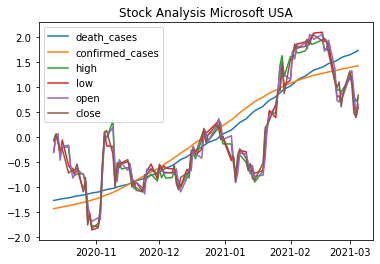

In [47]:
plt.plot(MSFT_final1.timestamp, MSFT_final1.death_cases, label = 'death_cases')
plt.plot(MSFT_final1.timestamp, MSFT_final1.confirmed_cases, label = 'confirmed_cases')
plt.plot(MSFT_final1.timestamp, MSFT_final1.high, label = 'high')
plt.plot(MSFT_final1.timestamp, MSFT_final1.low, label = 'low')
plt.plot(MSFT_final1.timestamp, MSFT_final1.open, label = 'open')
plt.plot(MSFT_final1.timestamp, MSFT_final1.close, label = 'close')
plt.legend()
plt.title('Stock Analysis Microsoft USA')
plt.show()

In [48]:
BB_final = final_data[final_data.stock_name == 'BB']
BB_final1 = pd.DataFrame()
BB_final1['timestamp'] = BB_final[BB_final['Country/Region'] == 'Canada'].timestamp
BB_final1['death_cases'] = (BB_final[BB_final['Country/Region'] == 'Canada'].death_cases - BB_final[BB_final['Country/Region'] == 'Canada'].death_cases.mean())/BB_final[BB_final['Country/Region'] == 'Canada'].death_cases.std()
BB_final1['confirmed_cases'] = (BB_final[BB_final['Country/Region'] == 'Canada'].confirmed_cases - BB_final[BB_final['Country/Region'] == 'Canada'].confirmed_cases.mean())/BB_final[BB_final['Country/Region'] == 'Canada'].confirmed_cases.std()
BB_final1['high'] = (BB_final[BB_final['Country/Region'] == 'Canada'].high - BB_final[BB_final['Country/Region'] == 'Canada'].high.mean())/BB_final[BB_final['Country/Region'] == 'Canada'].high.std()
BB_final1['low'] = (BB_final[BB_final['Country/Region'] == 'Canada'].low - BB_final[BB_final['Country/Region'] == 'Canada'].low.mean())/BB_final[BB_final['Country/Region'] == 'Canada'].low.std()
BB_final1['open'] = (BB_final[BB_final['Country/Region'] == 'Canada'].open - BB_final[BB_final['Country/Region'] == 'Canada'].open.mean())/BB_final[BB_final['Country/Region'] == 'Canada'].open.std()
BB_final1['close'] = (BB_final[BB_final['Country/Region'] == 'Canada'].close - BB_final[BB_final['Country/Region'] == 'Canada'].close.mean())/BB_final[BB_final['Country/Region'] == 'Canada'].close.std()